In [2]:
import numpy as np 
import pandas as pd 
import pickle
import matplotlib.pyplot as plt 
import seaborn as sns
import scipy.stats as stats
from scipy.stats import ttest_ind, pearsonr
import datetime
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
from kneed import DataGenerator, KneeLocator
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV, RepeatedStratifiedKFold, cross_val_score
from sklearn.metrics import make_scorer
from sklearn.decomposition import PCA
import sklearn.decomposition
from sklearn.cluster import MeanShift, estimate_bandwidth, Birch, BisectingKMeans,AffinityPropagation
from sklearn.mixture import GaussianMixture
from sklearn_extra.cluster import KMedoids
from skopt import BayesSearchCV
import itertools as it

In [3]:
import warnings
warnings.filterwarnings('ignore')
warnings.simplefilter('ignore')

In [4]:
# Load clean data:
data_c=pd.read_csv('data_clean.csv')
data_c.head()
#data_c['years_c

,Unnamed: 0,Unnamed: 0.1,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,...,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,any_promo,Total_products,Total_spent,days_customer
0,0,0,5524,1957,Graduation,Single,58138.0,0,0,2012-04-09,...,0,0,0,0,0,1,0,1617,22,971
1,1,1,2174,1954,Graduation,Single,46344.0,1,1,2014-08-03,...,0,0,0,0,0,0,0,27,4,125
2,2,2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,...,0,0,0,0,0,0,0,776,20,472
3,3,3,6182,1984,Graduation,Together,26646.0,1,0,2014-10-02,...,0,0,0,0,0,0,0,53,6,65
4,4,4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,...,0,0,0,0,0,0,0,422,14,321


In [5]:
data_c.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2237 entries, 0 to 2236
Data columns (total 33 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Unnamed: 0           2237 non-null   int64  
 1   Unnamed: 0.1         2237 non-null   int64  
 2   ID                   2237 non-null   int64  
 3   Year_Birth           2237 non-null   int64  
 4   Education            2237 non-null   object 
 5   Marital_Status       2237 non-null   object 
 6   Income               2237 non-null   float64
 7   Kidhome              2237 non-null   int64  
 8   Teenhome             2237 non-null   int64  
 9   Dt_Customer          2237 non-null   object 
 10  Recency              2237 non-null   int64  
 11  MntWines             2237 non-null   int64  
 12  MntFruits            2237 non-null   int64  
 13  MntMeatProducts      2237 non-null   int64  
 14  MntFishProducts      2237 non-null   int64  
 15  MntSweetProducts     2237 non-null   i

In [6]:
# I will only keep summarized features and theoreticly interesting to client in the porpose of clusification.
#Categorical demographic features will be droped.
data_b=data_c.drop(['Unnamed: 0','Unnamed: 0.1','ID','Dt_Customer', 'AcceptedCmp1', 'AcceptedCmp2','AcceptedCmp3','AcceptedCmp4','AcceptedCmp5','MntWines','MntFruits',
                   'MntMeatProducts','MntFishProducts',  'MntSweetProducts' ,'MntGoldProds','NumWebPurchases', 'NumCatalogPurchases','NumStorePurchases', 
                   'Education','Marital_Status', 'Year_Birth', 'Income', 'Kidhome', 'Teenhome', 'days_customer', 'NumWebVisitsMonth', 'Complain', 'Recency',], axis=1)
data_b.columns

Index(['NumDealsPurchases', 'Response', 'any_promo', 'Total_products',
       'Total_spent'],
      dtype='object')

In [7]:
data_b

,NumDealsPurchases,Response,any_promo,Total_products,Total_spent
0,3,1,0,1617,22
1,2,0,0,27,4
2,1,0,0,776,20
3,2,0,0,53,6
4,5,0,0,422,14
...,...,...,...,...,...
2232,2,0,0,1341,16
2233,7,0,1,444,15
2234,1,0,1,1241,18
2235,2,0,0,843,21


In [8]:
# Scale the data:

scaler=StandardScaler()
scaler.fit(data_b)
X=scaler.transform(data_b)
X

array([[ 0.34837058,  2.3869656 , -0.43881555,  1.68515626,  1.31254342],
       [-0.16909621, -0.41894194, -0.43881555, -0.96053885, -1.18596144],
       [-0.686563  , -0.41894194, -0.43881555,  0.28576658,  1.03493177],
       ...,
       [-0.686563  , -0.41894194,  1.03510394,  1.0595076 ,  0.75732012],
       [-0.16909621, -0.41894194, -0.43881555,  0.39725185,  1.17373759],
       [ 0.34837058,  2.3869656 , -0.43881555, -0.71926477, -0.63073814]])

In [9]:
#Identify n clusters:
sum_sqrd=[]
for n in range(1,20):
    model_km=KMeans(n_clusters=n, random_state=24)
    model_km=model_km.fit(X)
    sum_sqrd.append(model_km.inertia_)
    
#sum_sqrd  

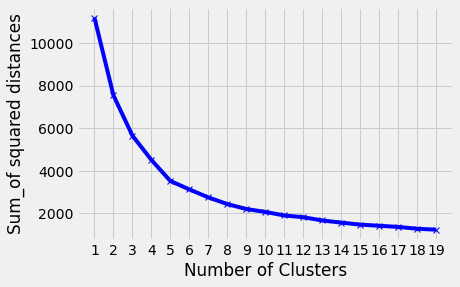

In [10]:
plt.style.use("fivethirtyeight")
plt.plot(range(1, 20),sum_sqrd , 'bx-')
plt.xticks(range(1, 20))
plt.xlabel('Number of Clusters')
plt.ylabel('Sum_of squared distances')
plt.show()

In [11]:
kl = KneeLocator(range(1, 20), sum_sqrd, curve="convex", direction="decreasing")
kl.elbow

5

In [12]:
# KMeans the first to try:
model_km=KMeans(n_clusters=5, n_init =10,  max_iter=400, random_state=24)
model_km=model_km.fit(X)
model_km.predict(X)

array([3, 4, 0, ..., 0, 0, 3])

In [13]:
model_km.labels_
labels_km=model_km.predict(X)

In [14]:
# Calculate Silhoutte Score

score = silhouette_score(X, model_km.labels_, metric='euclidean')

print('Silhouetter Score:', round(score, 3))

Silhouetter Score: 0.459


In [15]:
# Create labeled data:
df1=pd.DataFrame(X, columns=data_b.columns)
df1
df2=pd.DataFrame(labels_km)
df2.set_axis(['labels'], axis=1, inplace=True)
df2
data_l=pd.concat([df1,df2], axis=1)
data_l

,NumDealsPurchases,Response,any_promo,Total_products,Total_spent,labels
0,0.348371,2.386966,-0.438816,1.685156,1.312543,3
1,-0.169096,-0.418942,-0.438816,-0.960539,-1.185961,4
2,-0.686563,-0.418942,-0.438816,0.285767,1.034932,0
3,-0.169096,-0.418942,-0.438816,-0.917276,-0.908350,4
4,1.383304,-0.418942,-0.438816,-0.303275,0.202097,2
...,...,...,...,...,...,...
2232,-0.169096,-0.418942,-0.438816,1.225904,0.479708,0
2233,2.418238,-0.418942,1.035104,-0.266668,0.340903,2
2234,-0.686563,-0.418942,1.035104,1.059508,0.757320,0
2235,-0.169096,-0.418942,-0.438816,0.397252,1.173738,0


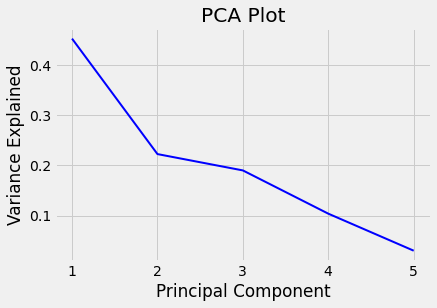

In [16]:
# Steps to plot the clusters:

pca = sklearn.decomposition.PCA()
pca.fit(X)


PC_values = np.arange(pca.n_components_) + 1
plt.plot(PC_values, pca.explained_variance_ratio_, '-', linewidth=2, color='blue')
plt.title('PCA Plot')
plt.xlabel('Principal Component')
plt.ylabel('Variance Explained')
plt.show()

In [17]:
data_l['labels'].value_counts()

4    998
0    628
2    241
3    206
1    164
Name: labels, dtype: int64

In [18]:
l_km=[]
labels_t=list(labels_km)
for x in labels_t:
    if x not in l_km:
        l_km.append(x)
l_km   

[3, 4, 0, 2, 1]

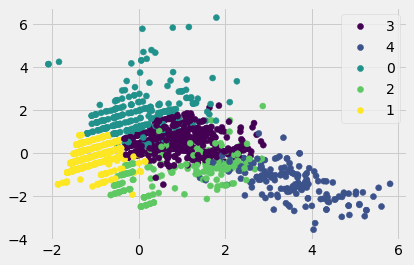

In [19]:
components=pca.transform(X)
plot = plt.scatter(components[:,0], components[:,1], c=data_l['labels'])
plt.legend(handles=plot.legend_elements()[0], labels=l_km)
plt.show()

# The clusters look very dense, with some overlapping

In [20]:
model_km2=KMeans(n_clusters=2, n_init =10,  max_iter=400, random_state=24)
model_km2=model_km2.fit(X)
model_km2.predict(X)

array([1, 0, 1, ..., 1, 1, 0])

In [21]:
model_km2.labels_
labels_km_2=model_km2.predict(X)

In [22]:
score_2 = silhouette_score(X, model_km2.labels_, metric='euclidean')

print('Silhouetter Score:', round(score_2, 3))

Silhouetter Score: 0.378


In [23]:
km_t=KMeans(max_iter=200, n_clusters=2, n_init=1, random_state=24).fit(X)
score = silhouette_score(X, km_t.labels_, metric='euclidean')
score
# Didn't improve the score. Manual search might be needed.

0.3776929187216319

In [24]:
m_model_=KMeans(max_iter=200, n_clusters=5, n_init=8, random_state=24).fit(X)
score = silhouette_score(X, m_model_.labels_, metric='euclidean')
score

0.4589645318115433

In [25]:
np.unique(m_model_.labels_, return_counts=True)

(array([0, 1, 2, 3, 4]), array([628, 164, 241, 206, 998], dtype=int64))

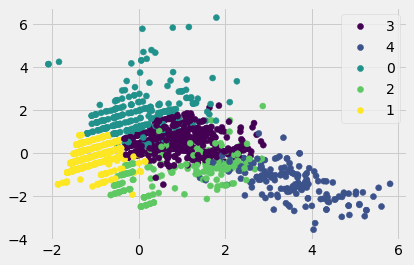

In [26]:
components=pca.transform(X)
plot = plt.scatter(components[:,0], components[:,1], c=m_model_.labels_)
plt.legend(handles=plot.legend_elements()[0], labels=l_km)
plt.show()

In [27]:
# I will also try using Affinity Propagation, although mignt not work well for this size data. 



In [28]:
model_AP=AffinityPropagation(damping=0.9,max_iter=500,convergence_iter= 10, affinity='euclidean',  random_state=24 )
model_AP=model_AP.fit(X)
pred=model_AP.predict(X)
labels=model_AP.labels_
labels

array([18,  1, 13, ..., 28, 41, 54], dtype=int64)

In [29]:
cluster_centers_indices = model_AP.cluster_centers_indices_

n_clusters_ = len(cluster_centers_indices)
print('Number of clusters:', n_clusters_)

Number of clusters: 63


In [30]:
score_ap = silhouette_score(X, labels, metric='euclidean')

print('Silhouetter Score:', round(score_ap, 3))

Silhouetter Score: 0.45


In [31]:
model_AP1=AffinityPropagation(damping=0.75, max_iter=200,convergence_iter= 10, affinity='euclidean',  random_state=24 )
model_AP1=model_AP1.fit(X)
labels=model_AP1.labels_
labels

array([16, 36, 12, ..., 29, 42,  1], dtype=int64)

In [32]:
n_clusters_ = len(model_AP1.cluster_centers_indices_)
print('Number of clusters:', n_clusters_)

Number of clusters: 65


In [33]:
score_ap = silhouette_score(X, labels, metric='euclidean')

print('Silhouetter Score:', round(score_ap, 3))

# The score is higher but we still have too many clusters. We will not be able to use it effectively.

Silhouetter Score: 0.458


In [34]:
#Next I will try Mean shift which is more robust but also more computationaly expensive.
#We start with estimating the bandwidth:
bandwidth = estimate_bandwidth(X, quantile=0.5)
bandwidth

2.6953823068536176

In [35]:
#Next I will try MeanShift:

meanshift = MeanShift(bandwidth=bandwidth)
meanshift.fit(X)
labels_ms = meanshift.labels_
labels_unique = np.unique(labels_ms)
n_clusters_ = len(labels_unique)
print(n_clusters_)
labels_unique 

3


array([0, 1, 2], dtype=int64)

In [60]:
components=pca.transform(X)
plot = plt.scatter(components[:,0], components[:,1], c=data_l["labels_"])
plt.legend(handles=plot.legend_elements()[0], labels=l_mst)
plt.show()

KeyError: 'labels_'

In [37]:
# I will try another robust model to see if the score can be improved.
model_brc = Birch(n_clusters=4)
model_brc.fit(X)
brc_labels=model_brc.predict(X)
np.unique(brc_labels, return_counts=True)

(array([0, 1, 2, 3], dtype=int64),
 array([ 196,   35,  229, 1777], dtype=int64))

In [38]:
score_brc = silhouette_score(X, brc_labels, metric='euclidean')

print('Silhouetter Score:', round(score_brc, 3))


Silhouetter Score: 0.423


In [39]:
Birch().get_params()

{'branching_factor': 50,
 'compute_labels': True,
 'copy': True,
 'n_clusters': 3,
 'threshold': 0.5}

In [40]:
model_brco=Birch(branching_factor= 100, compute_labels=True, n_clusters= 2, threshold= 0.5)

#model_brct=Birch(branching_factor= 25, compute_labels=True, copy= True, n_clusters= 3, threshold= 0.25)
model_brco.fit(X)
labels_brco=model_brco.predict(X)
len(np.unique(labels_brco))

2

In [41]:
score_brco= silhouette_score(X, labels_brco, metric='euclidean')

print('Silhouetter Score:', round(score_brco, 3))

Silhouetter Score: 0.482


This is the highest score so far. It only has two groups.

In [42]:
brco_list=list(np.unique(labels_brco))
brco_list

[0, 1]

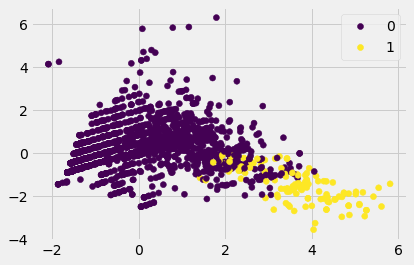

In [43]:
components=pca.transform(X)
plot = plt.scatter(components[:,0], components[:,1], c=labels_brco)
plt.legend(handles=plot.legend_elements()[0], labels=brco_list)
plt.show()

In [ ]:
np.unique(labels_brco, return_counts=True)

In [44]:
# Manualy search for best silhouette_score to select number of clusters:
components=[2,3,4,5,6,7,8,9,10]
for n  in components:
    bm_model= BisectingKMeans(n_clusters=n, random_state=24)
    bm_model.fit(X)
    bm_labels=bm_model.predict(X)
    score_bm= silhouette_score(X, bm_labels, metric='euclidean')
    print(n, len(np.unique(bm_labels)), 'Silhouetter Score:', round(score_bm, 3))

2 2 Silhouetter Score: 0.377
3 3 Silhouetter Score: 0.4
4 4 Silhouetter Score: 0.355
5 5 Silhouetter Score: 0.349
6 6 Silhouetter Score: 0.367
7 7 Silhouetter Score: 0.374
8 8 Silhouetter Score: 0.266
9 9 Silhouetter Score: 0.277
10 10 Silhouetter Score: 0.286


In [45]:
# KMeans it the best model so far.
# Now I will try BisectingKMeans wich is based on k means but can give similar proportions clusters with better clustering accuray.
# The same number of clusters will be used
bisect_means = BisectingKMeans(n_clusters=2, random_state=24)
bisect_means.fit(X)
bisect_labels=bisect_means.labels_

In [46]:
score_bm= silhouette_score(X, bisect_labels, metric='euclidean')

print('Silhouetter Score:', round(score_bm, 3))

Silhouetter Score: 0.377


In [47]:
bkm=BisectingKMeans(n_clusters=6, bisecting_strategy= 'biggest_inertia',max_iter=100, n_init=2, init= 'k-means++', random_state=24)
bkm.fit(X)
bkm_labels=bkm.predict(X)
score_bkm= silhouette_score(X, bkm_labels, metric='euclidean')

print('Silhouetter Score:', round(score_bkm, 3))

print(np.unique(bkm_labels, return_counts=True))

Silhouetter Score: 0.429
(array([0, 1, 2, 3, 4, 5]), array([1183,   99,  562,  148,  151,   94], dtype=int64))


In [48]:
#We can also try probability based, soft clustering: 
# Sart with number of clusters search:
components=[2,3,4,5,6,7,8,9,10]
for n  in components:
    gm_model= GaussianMixture(n_components=n, random_state=24)
    gm_model.fit(X)
    gm_labels=gm_model.predict(X)
    score_gm= silhouette_score(X, gm_labels, metric='euclidean')
    print(n, len(np.unique(gm_labels)), 'Silhouetter Score:', round(score_gm, 3))

2 2 Silhouetter Score: 0.314
3 3 Silhouetter Score: 0.312
4 4 Silhouetter Score: 0.286
5 5 Silhouetter Score: 0.256
6 6 Silhouetter Score: 0.176
7 7 Silhouetter Score: 0.355
8 8 Silhouetter Score: 0.156
9 9 Silhouetter Score: 0.295
10 10 Silhouetter Score: 0.295


In [49]:
gm_model1= GaussianMixture(n_components=7, random_state=24)
gm_model1.fit(X)
gm_labels1=gm_model1.predict(X)

In [50]:
score_gm= silhouette_score(X, gm_labels1, metric='euclidean')

print('Silhouetter Score:', round(score_gm, 3))

Silhouetter Score: 0.355


In [51]:
print(np.unique(gm_labels, return_counts=True))

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=int64), array([596, 119,  30,   6, 134, 110,  88, 570, 451, 133], dtype=int64))


In [52]:
gm_model3= GaussianMixture(n_components=8, covariance_type= 'tied',
 init_params='kmeans',
 max_iter= 100,
 n_init= 3, random_state=24
)

gm_model3.fit(X)
gm_labels3=gm_model3.predict(X)
score_gm3= silhouette_score(X, gm_labels3, metric='euclidean')
print('Silhouetter Score:', round(score_gm3, 3))

print(np.unique(gm_labels3, return_counts=True))

Silhouetter Score: 0.454
(array([0, 1, 2, 3, 4, 5, 6, 7], dtype=int64), array([ 111,  163,  109,   82,   17,  572,  143, 1040], dtype=int64))


In [53]:
#Kmedoids will be tried as well to see if a median based alegorithm can show better results.
# Esimate elbow for the kmedoids:
sum_sqrd1=[]
for n in range(1,20):
    kmedoids = KMedoids(n_clusters=n, random_state=24).fit(X)
    sum_sqrd1.append(kmedoids.inertia_)
sum_sqrd1
kl2 = KneeLocator(range(1, 20), sum_sqrd1, curve="convex", direction="decreasing")
kl2.elbow

7

In [54]:
kmedoids= KMedoids(n_clusters=7, random_state=24).fit(X)
kmedoids_labels=kmedoids.predict(X)
score_kmed= silhouette_score(X, kmedoids_labels, metric='euclidean')
print( 'Silhouetter Score:', round(score_kmed, 3))

Silhouetter Score: 0.245


In [55]:
# The elbow method didn't show good enough results, I will continue looking for best number of clusters.
components=[2,3,4,5,6,7,8,9,10]
for n  in components:
    kmedoids= KMedoids(n_clusters=n, random_state=24).fit(X)
    kmedoids_labels=kmedoids.predict(X)
    score_= silhouette_score(X, kmedoids_labels, metric='euclidean')
    print(n, len(np.unique(kmedoids_labels)), 'Silhouetter Score:', round(score_, 3))

2 2 Silhouetter Score: 0.368
3 3 Silhouetter Score: 0.335
4 4 Silhouetter Score: 0.356
5 5 Silhouetter Score: 0.267
6 6 Silhouetter Score: 0.176
7 7 Silhouetter Score: 0.245
8 8 Silhouetter Score: 0.221
9 9 Silhouetter Score: 0.211
10 10 Silhouetter Score: 0.213


In [56]:
kmedoids_= KMedoids(n_clusters=2, metric="cosine", init="heuristic", 
      max_iter=10, random_state=24).fit(X)
kmed_labels=kmedoids_.labels_

In [57]:
score_kmed= silhouette_score(X, kmed_labels, metric='euclidean')
print('Silhouetter Score:', round(score_kmed, 3))

Silhouetter Score: 0.369


In [58]:
KMedoids_1=KMedoids(init='k-medoids++', max_iter= 100, metric= 'cosine', n_clusters= 6, random_state=24)
KMedoids_1.fit(X)
kmd_labels=KMedoids_1.predict(X)
score_kmd= silhouette_score(X, kmd_labels, metric='euclidean')
print('Silhouetter Score:', round(score_kmd, 3))

print(np.unique(kmd_labels, return_counts=True))

Silhouetter Score: 0.442
(array([0, 1, 2, 3, 4, 5], dtype=int64), array([937, 321, 205, 158, 170, 446], dtype=int64))


In [59]:
# Save the Models to file in the current working directory

Pkl_Filename = "model_km_features.pkl"  

with open(Pkl_Filename, 'wb') as file:  
    pickle.dump(model_km, file)
    

In [ ]:
Pkl_Filename = "meanshift_pt_features.pkl"  

with open(Pkl_Filename, 'wb') as file:  
    pickle.dump(meanshift_pt, file)

In [ ]:
Pkl_Filename = "model_AP_features.pkl"  

with open(Pkl_Filename, 'wb') as file:  
    pickle.dump(model_AP, file)

In [ ]:
Pkl_Filename="model_brc_features.pkl"

with open(Pkl_Filename,'wb') as file:
    pickle.dump(model_brc,file)

In [ ]:
#Pkl_Filename="model_brco_features.pkl"

#with open(Pkl_Filename,'wb') as file:
#pickle.dump(model_brco,file)

In [ ]:
Pkl_Filename="model_brct_features.pkl"

with open(Pkl_Filename,'wb') as file:
    pickle.dump(model_brct,file)

In [ ]:
Pkl_Filename="gm_model2_features.pkl"

with open (Pkl_Filename, 'wb') as file:
    pickle.dump(gm_model2,file)

In [ ]:
Pkl_Filename="gm_model1_features.pkl"

with open (Pkl_Filename, 'wb') as file:
    pickle.dump(gm_model1,file)

In [ ]:
Pkl_Filename="bisect_means_features.pkl"

with open (Pkl_Filename, 'wb') as file:
    pickle.dump(bisect_means,file)

In [ ]:
Pkl_Filename="kmedoids_features.pkl"

with open (Pkl_Filename, 'wb') as file:
    pickle.dump(kmedoids_,file)

In [ ]:
Pkl_Filename="m_model_features.pkl"
with open (Pkl_Filename, 'wb') as file:
    pickle.dump(m_model_,file)